In [8]:
from wy_baseline import wy_tradegy, selc_func
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

## import data

In [9]:
data = pd.read_csv('../data/processed.csv')
from datetime import datetime
data['date'] = pd.to_datetime(data['date'])
data = data.loc[data['date'] >= pd.to_datetime('2020-01-09')]
data = data.loc[data['date'] <= pd.to_datetime('2022-10-28')]
predict = pd.read_csv('../data/predict.csv')
predict = predict[:len(data)]

In [10]:
open_truth = list(predict['open_truth'])
close_truth = list(predict['close_truth'])
high = list(predict['high'])
high_truth = list(predict['high_truth'])
low = list(predict['low'])
low_truth = list(predict['low_truth'])
open = list(predict['open'])
close = list(predict['close'])

## trading

In [11]:
def trade(bias=50,water=0.8,out=False,window = 10,water_adjust=False):
    rk = 1.0
    rk_list = []
    amp_list = []
    for i in range(len(open_truth)-1):
        if water_adjust:
            water *= open[i+1]/open[i]
            water = min(water, 1)
            water = max(water, 0)
        amptl = wy_tradegy(high[i]+bias, low[i]-bias, high_truth[i], low_truth[i], open_truth[i], close_truth[i], water)
        if out:
            amp_list.append(amptl)
            if amptl < 1:
                out_flag = sum(amp_list[-window:]) / window
            if out_flag<1:
                amptl = 1
        rk *= amptl
        # 万1.1手续费
        rk *= 0.99989
        rk_list.append(rk)
    return rk_list

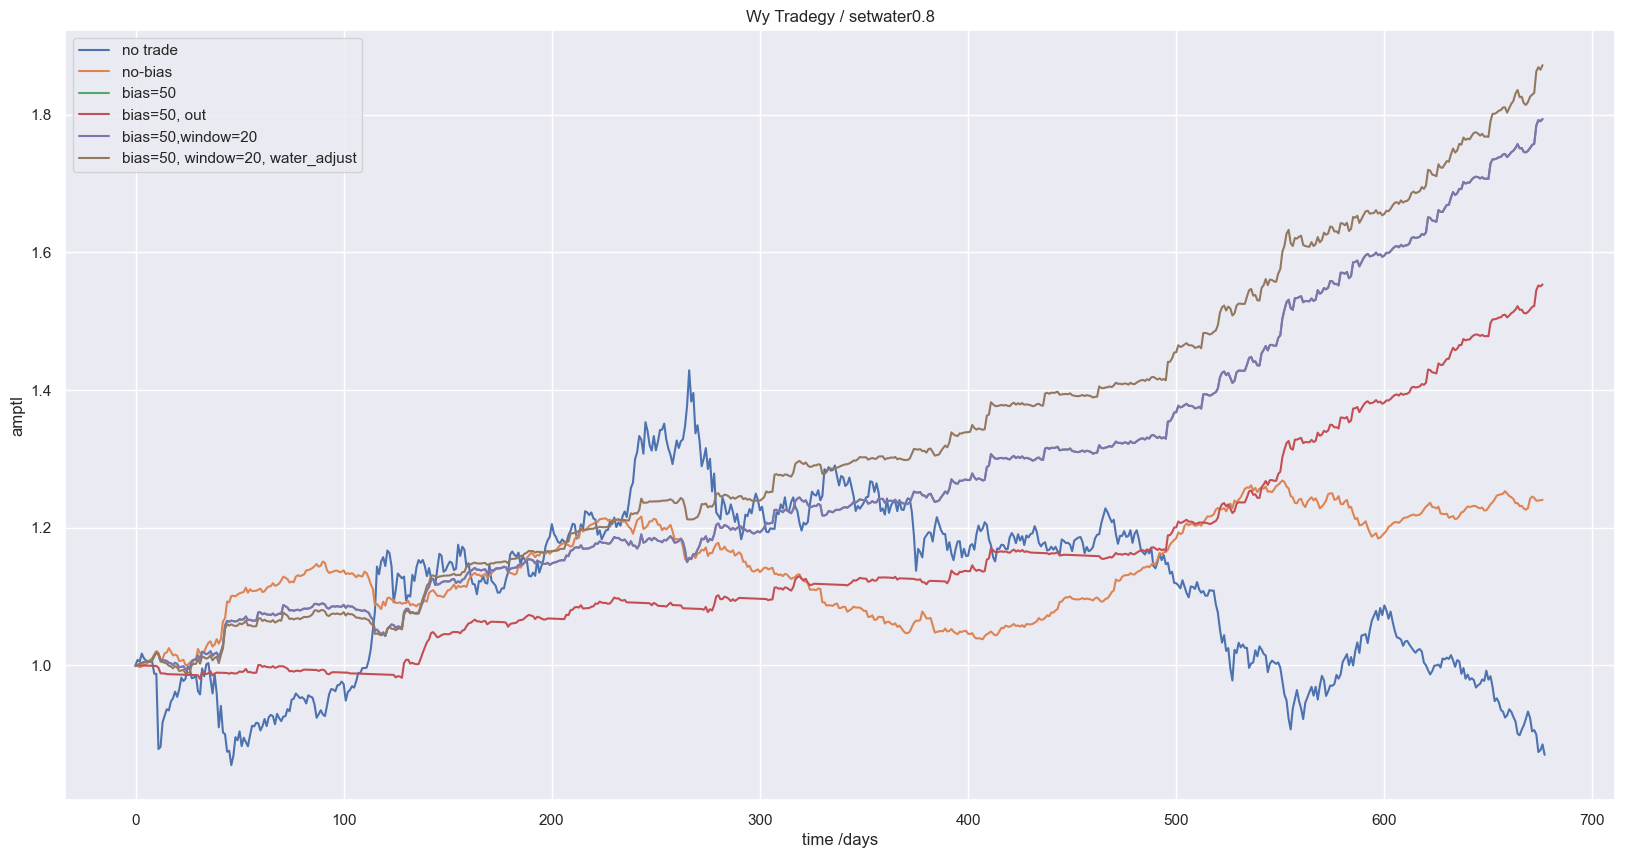

In [16]:
plt.figure(figsize=(20,10))
plt.plot(np.array(open_truth)/open_truth[0], label='no trade')
plt.plot(trade(bias=0,water=0.8), label='no-bias')
plt.plot(trade(bias=50,water=0.8), label='bias=50')
plt.plot(trade(bias=50,water=0.8,out=True), label='bias=50, out')
plt.plot(trade(bias=50,water=0.8,window=10), label='bias=50,window=20')
plt.plot(trade(bias=50,water=0.8,window=10,water_adjust=True), label='bias=50, window=20, water_adjust')

plt.title('Wy Tradegy / setwater{}'.format(0.8))
plt.xlabel('time /days')
plt.ylabel('amptl')
plt.legend()
plt.show()

## set different water to check the results

In [13]:
def set(x):
    rk = 1.0
    #print(wy_tradegy(1, 0.8, 1, 0.4, 0.5, 0.5, 0.5))
    for i in range(len(open_truth)):
        amptl = wy_tradegy(high[i]+50, low[i]-50, high_truth[i], low_truth[i], open_truth[i], close_truth[i], x)
        #amptl = wy_tradegy(open_truth[i] + (high[i] - low[i]) / 2, open_truth[i] - (high[i] - low[i]) / 2, high_truth[i], low_truth[i], open_truth[i], close_truth[i], 0.5)
        rk *=amptl
            # 万1.1手续费
        rk*= 0.99989

    return rk

Text(0.5, 0, 'setwater')

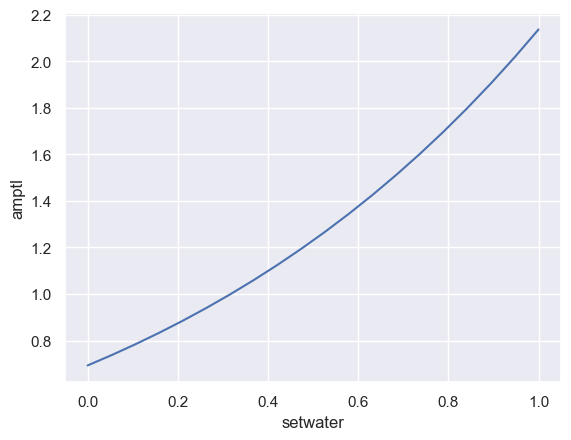

In [14]:
plt.plot(np.linspace(0,1,20), [set(x/100) for x in range(0,100,5)])
plt.ylabel('amptl')
plt.xlabel('setwater')